Import knihoven


In [95]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt


Import souboru se jmeny 

In [96]:
classesfile='coco.names'
classNames=[]
with open(classesfile,'rt') as f:
    classNames=f.read().rstrip('\n').split('\n')

Model

In [97]:
model = YOLO('yolov8m.pt')

Pokud chci hledat urcity objekt zjisti jeho id

In [98]:
searched_object = 'pottedplant'
object_id = classNames.index(searched_object)# zjisti class id objektu co hledam
print(object_id)

58


nacte a zobrazy zvoleny obrazek

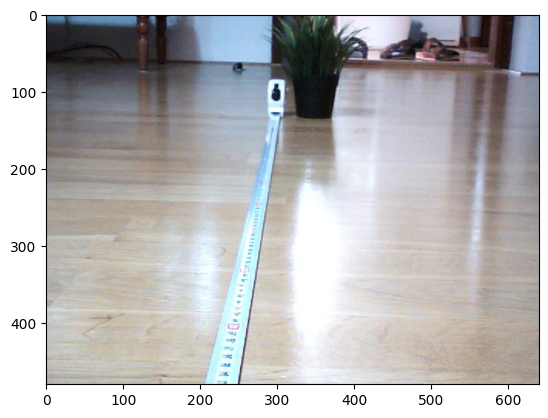

In [99]:
img = cv2.imread('2.jpg')
#cv2.imshow('picture',img)
#cv2.waitKey(2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

zjisti velikost obrazku 

In [100]:
img_height,img_width,img_channels = img.shape
print('width',img_width,'Px')
print('height',img_height,'Px')
print('channels',img_channels)

width 640 Px
height 480 Px
channels 3


pouziti modelu na nalezeni objektu

In [101]:
results = model(img)



0: 480x640 1 potted plant, 364.2ms
Speed: 0.0ms preprocess, 364.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


vykresleni jednotlivych objektu na obrazek

In [102]:
objects_ids = []#list pro uchovavani id nalezenych objektu 
objects_centers = []#list pro uchovavani souradnic stredu nalezenych objektu
objects_heights = []# list for objects height 
for r in results:
        boxes = r.boxes
        for box in boxes:
            cls = int(box.cls[0])#zjisti classu objektu
            print(classNames[cls])#vypise klassu objektu slovem
            #print(cls) #vypise classu objektu jako id
            #bounding boxes
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px 
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci 
            #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            center = center_x,center_y
            print('center:',center_x,center_y)#vypise udaje 
            cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
            #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
            #box on bounding box s nazvem claasy a confidence modelu 
            cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            objects_ids.append(cls)#zapisovani hodnot do listu
            objects_centers.append(center)#zapisovani hodnot do listu
            objects_heights.append(y2)
cv2.line(img,(int(img_width/2),0),(int(img_width/2),img_height),(255,0,255),thickness=2 )#vykresli na video primku stredem videa 

pottedplant
X= 272 Y= 0 W= 422 H= 137
center: 347 68
confidence: 90


array([[[157, 135, 107],
        [158, 136, 108],
        [163, 137, 107],
        ...,
        [193, 161, 132],
        [191, 159, 130],
        [189, 158, 127]],

       [[158, 132, 102],
        [161, 133, 103],
        [164, 135, 104],
        ...,
        [193, 161, 132],
        [191, 159, 130],
        [189, 158, 127]],

       [[164, 129,  96],
        [165, 130,  97],
        [168, 131,  97],
        ...,
        [193, 161, 132],
        [191, 159, 130],
        [188, 157, 126]],

       ...,

       [[166, 177, 181],
        [166, 177, 181],
        [167, 178, 182],
        ...,
        [152, 158, 169],
        [153, 157, 168],
        [152, 156, 167]],

       [[166, 176, 183],
        [166, 176, 183],
        [166, 176, 183],
        ...,
        [152, 158, 171],
        [152, 155, 169],
        [151, 154, 168]],

       [[162, 171, 180],
        [162, 171, 180],
        [162, 171, 180],
        ...,
        [152, 158, 171],
        [153, 156, 170],
        [152, 155, 169]]

vypise id nalezenych objektu 

In [103]:
print(objects_ids)
print(objects_centers)
print(objects_heights)

[58]
[(347, 68)]
[137]


hledani urciteho objektu

In [104]:
a = objects_ids.index(58)#v listu object_ids hleda urcite cislo a vypise jeho index
print(a)
x,y=objects_centers[a]# v listu object centers hleda pro dany index hodnoty
print(x,y)
center_line = int(img_width/2)# x souradnice primky zobrazujici stred
object_deviation = center_line-x #odchylka objektu od stredu obrazovky
print('deviation = ',object_deviation) 
h = objects_heights[a]
print(h)
distance = 186.823-0.334448*h
print(distance)



0
347 68
deviation =  -27
137
141.003624


ukaze obrazek

tensor([[2.7239e+02, 1.1600e-01, 4.2204e+02, 1.3712e+02, 9.0144e-01, 5.8000e+01]])


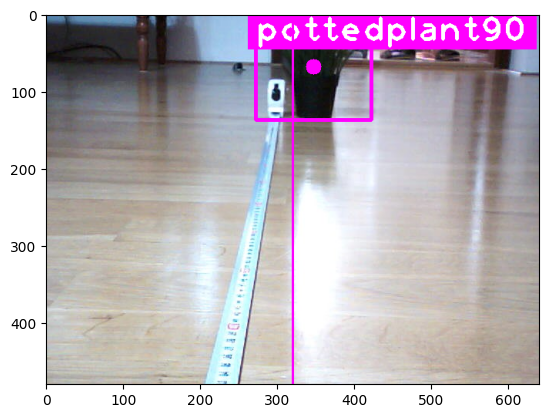

In [105]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# konvertuje bgr to rgb
print(boxes.data)
